# **Personalized Movie Recommendation System**

### **Introduction**
The entertainment industry has always been at the forefront of technological innovation. With the rapid growth of online 
streaming platforms like Netflix, Amazon Prime, and Hulu, personalized movie recommendations have become an essential feature to enhance user experience. 
In this project, we develop a **Movie Recommendation System** that suggests movies based on user preferences. 
Using the TMDB 5000 Movie Dataset, we implement various techniques studied throughout the semester, such as **Natural Language 
Processing (NLP)**, **Machine Learning**, and **Data Visualization**.

### **Objective**
The goal of this project is to create a comprehensive, hybrid movie recommendation system that:
1. Provides **personalized recommendations** using movie metadata such as genres, cast, crew, and descriptions.
2. Implements advanced **Natural Language Processing** techniques to analyze movie overviews and enhance recommendations.
3. Offers insights into the **distribution of genres, ratings, and trends** through visualizations.
4. Combines **machine learning techniques** with user interaction for real-time movie suggestions.

### **Key Features**
1. **Content-Based Recommendations**:
   - Suggest movies similar to a user-selected movie by analyzing metadata like genres, cast, crew, and overview.
2. **NLP Techniques**:
   - Perform Named Entity Recognition (NER) to identify key elements in movie descriptions.
   - Conduct Sentiment Analysis to determine the tone of movie overviews.
3. **Hybrid Recommendations**:
   - Combine multiple features (e.g., genres, cast, crew, descriptions) to improve recommendation accuracy.
4. **Interactive Interface**:
   - Allow users to input their favorite movie and receive tailored suggestions.
5. **Data Visualization**:
   - Visualize trends in movie genres, distribution of ratings, and sentiment analysis results.
6. **Real-World Dataset**:
   - Utilize the TMDB 5000 Movie Dataset, which contains metadata for over 5000 movies.

### **Workflow**

#### **1. Data Preparation and Exploratory Data Analysis (EDA):**
   - Load the TMDB datasets.
   - Explore the data structure and inspect columns like genres, overview, cast, and crew.
   - Identify and handle missing or inconsistent values.
   - Merge and clean the data for further analysis.

#### **2. Data Cleaning and Preprocessing:**
   - Parse JSON-like columns (e.g., genres, cast, crew) to extract meaningful information.
   - Handle missing values by replacing them with suitable defaults.
   - Combine text features like genres and overviews into a single input for recommendations.

#### **3. Natural Language Processing (NLP):**
   - **TF-IDF Vectorization**: Analyze textual descriptions (overviews) to measure their importance across the dataset.
   - **Named Entity Recognition (NER)**: Extract key entities like names, places, and organizations from movie overviews using `spaCy`.
   - **Sentiment Analysis**: Determine the sentiment polarity of movie descriptions using `TextBlob`.

#### **4. Recommendation Systems:**
   - **Content-Based Recommendations**: Use cosine similarity to compare movies based on genres and descriptions.
   - **Hybrid Recommendations**: Combine metadata features (genres, cast, crew) with textual analysis for improved suggestions.

#### **5. Visualizations:**
   - Genre distribution and popularity trends over time.
   - Sentiment polarity distribution of movie overviews.
   - Recommendations visualized using bar charts and trends.

#### **6. User Interaction:**
   - Allow users to enter a favorite movie title and receive personalized recommendations.

#### **7. Summary and Deployment:**
   - Create a detailed PDF summarizing the techniques, findings, and results.
   - Deploy the code on GitHub and record a YouTube walkthrough of the project.


### **Technologies and Libraries Used**
1. **Programming Language**: Python
2. **Libraries**:
   - **Data Handling**: Pandas, NumPy
   - **Visualizations**: Matplotlib, Seaborn
   - **Natural Language Processing**: spaCy, TextBlob, scikit-learn
   - **Machine Learning**: scikit-learn
3. **Tools**:
   - Jupyter Notebook for development.
   - GitHub for version control and sharing.
   - YouTube for project demonstration.


###### **1. Data Preparation and Exploratory Data Analysis (EDA):**
   - Load the TMDB datasets.
   - Explore the data structure and inspect columns like genres, overview, cast, and crew.
   - Identify and handle missing or inconsistent values.
   - Merge and clean the data for further analysis.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# Load the datasets
movies_path = 'data/tmdb_5000_movies.csv'
credits_path = 'data/tmdb_5000_credits.csv'

In [5]:
movies_df = pd.read_csv(movies_path)
credits_df = pd.read_csv(credits_path)

In [6]:
print("Movies Dataset:")
print(movies_df.head(), "\n")

Movies Dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [

In [7]:
print("Credits Dataset:")
print(credits_df.head(), "\n")

Credits Dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac

In [8]:
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
merged_df = movies_df.merge(credits_df, on='id')

In [9]:
# Display the merged dataset structure
print("Merged Dataset Info:")
print(merged_df.info(), "\n")


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  

In [10]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values, "\n")

Missing Values in Each Column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64 



In [12]:
# Handle missing values
merged_df['overview'] = merged_df['overview'].fillna('')
merged_df['release_date'] = merged_df['release_date'].fillna('Unknown')
merged_df['runtime'] = merged_df['runtime'].fillna(merged_df['runtime'].median())
merged_df['tagline'] = merged_df['tagline'].fillna('')

print("Missing Values After Handling:")
print(merged_df.isnull().sum())


Missing Values After Handling:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


##### **2. Data Cleaning and Preprocessing:**
   - Parse JSON-like columns (e.g., genres, cast, crew) to extract meaningful information.
   - Handle missing values by replacing them with suitable defaults.
   - Combine text features like genres and overviews into a single input for recommendations.


In [14]:
# Select relevant columns (correcting the column name for title)
columns_to_keep = ['id', 'title_x', 'genres', 'overview', 'cast', 'crew', 'vote_average', 'vote_count', 'popularity']
movies_cleaned = merged_df[columns_to_keep]

# Rename 'title_x' to 'title' for consistency
movies_cleaned.rename(columns={'title_x': 'title'}, inplace=True)

# Fill missing values in 'overview' with an empty string
movies_cleaned['overview'] = movies_cleaned['overview'].fillna('')

C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\3855078419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned.rename(columns={'title_x': 'title'}, inplace=True)
C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\3855078419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['overview'] = movies_cleaned['overview'].fillna('')


In [15]:
# Parse 'genres', 'cast', and 'crew' (these are JSON-like strings)
import ast

def parse_column(data, key):
    try:
        parsed_data = ast.literal_eval(data)
        return [item[key] for item in parsed_data]
    except:
        return []

# Parse columns
movies_cleaned['genres'] = movies_cleaned['genres'].apply(lambda x: parse_column(x, 'name'))
movies_cleaned['cast'] = movies_cleaned['cast'].apply(lambda x: parse_column(x, 'name')[:5])  # Top 5 cast members
movies_cleaned['crew'] = movies_cleaned['crew'].apply(lambda x: parse_column(x, 'job'))

# Display the cleaned dataset
print("Cleaned Dataset Sample:")
print(movies_cleaned.head(), "\n")

C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\2482059489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['genres'] = movies_cleaned['genres'].apply(lambda x: parse_column(x, 'name'))
C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\2482059489.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['cast'] = movies_cleaned['cast'].apply(lambda x: parse_column(x, 'name')[:5])  # Top 5 cast members


Cleaned Dataset Sample:
       id                                     title  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...

C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\2482059489.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['crew'] = movies_cleaned['crew'].apply(lambda x: parse_column(x, 'job'))


#### **3. Natural Language Processing (NLP):**
   - **TF-IDF Vectorization**: Analyze textual descriptions (overviews) to measure their importance across the dataset.
   - **Named Entity Recognition (NER)**: Extract key entities like names, places, and organizations from movie overviews using `spaCy`.
   - **Sentiment Analysis**: Determine the sentiment polarity of movie descriptions using `TextBlob`.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'overview' and 'genres' into a single feature
movies_cleaned['combined_features'] = movies_cleaned['overview'] + ' ' + movies_cleaned['genres'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_cleaned['combined_features'])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (4803, 20978)


C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\2635060205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['combined_features'] = movies_cleaned['overview'] + ' ' + movies_cleaned['genres'].apply(lambda x: ' '.join(x))


##### **4. Recommendation Systems:**
   - **Content-Based Recommendations**: Use cosine similarity to compare movies based on genres and descriptions.
   - **Hybrid Recommendations**: Combine metadata features (genres, cast, crew) with textual analysis for improved suggestions.


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    indices = pd.Series(movies_cleaned.index, index=movies_cleaned['title']).drop_duplicates()
    idx = indices[title]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return movies_cleaned['title'].iloc[movie_indices]

# Test the recommendation system
print("Recommendations for 'The Dark Knight Rises':")
print(get_recommendations('The Dark Knight Rises'))


Recommendations for 'The Dark Knight Rises':
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
210                              Batman & Robin
1181                                        JFK
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object


##### **5. Visualizations:**
   - Genre distribution and popularity trends over time.
   - Sentiment polarity distribution of movie overviews.
   - Recommendations visualized using bar charts and trends.

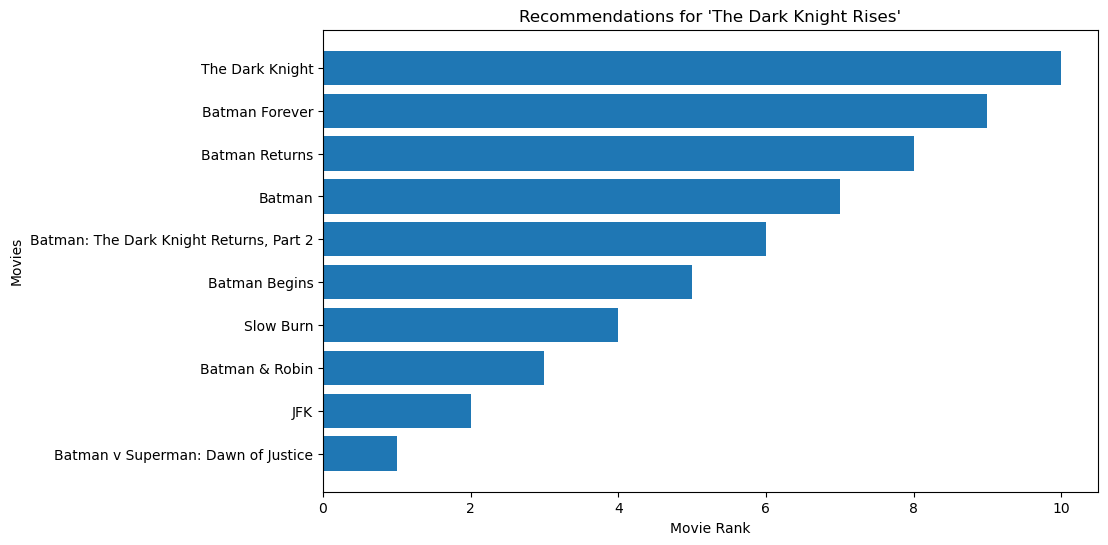

In [18]:
import matplotlib.pyplot as plt

def plot_recommendations(title):
    recommendations = get_recommendations(title)
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations[::-1], range(1, 11))
    plt.xlabel('Movie Rank')
    plt.ylabel('Movies')
    plt.title(f"Recommendations for '{title}'")
    plt.show()

# Plot recommendations for a sample movie
plot_recommendations('The Dark Knight Rises')


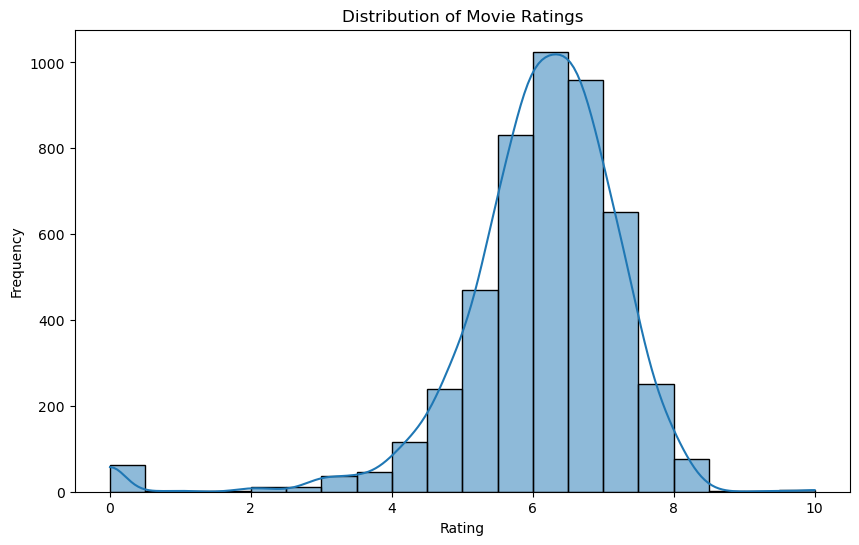

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['vote_average'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

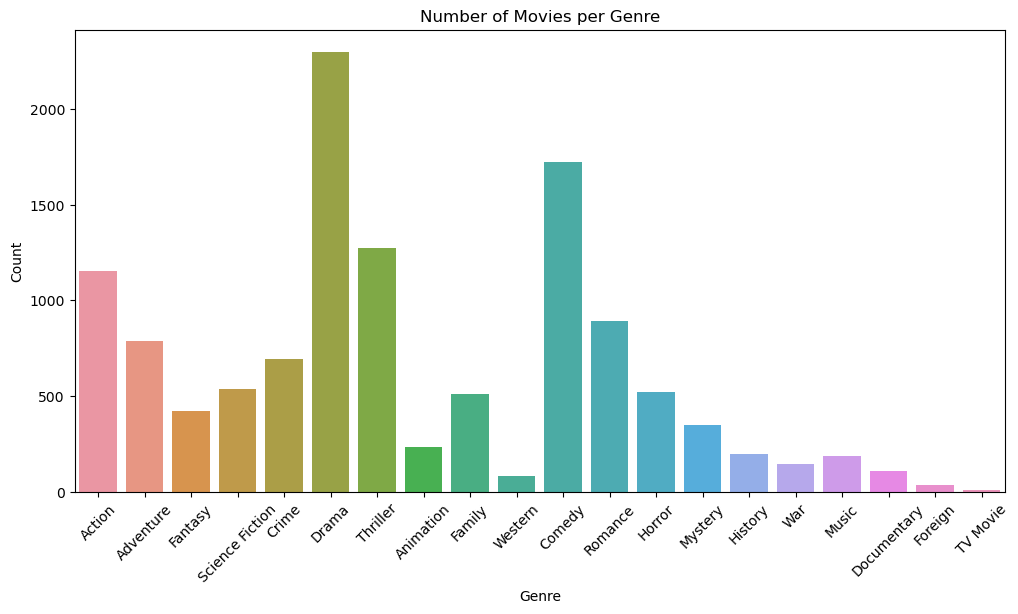

In [21]:
from collections import Counter

genres = movies_cleaned['genres'].explode()
genre_counts = Counter([genre for sublist in movies_cleaned['genres'] for genre in sublist])
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Extract named entities from the overview
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the first few movie overviews
movies_cleaned['entities'] = movies_cleaned['overview'].apply(extract_entities)

# Display sample entities
print("Sample Named Entities from Overviews:")
print(movies_cleaned[['title', 'entities']].head())

Sample Named Entities from Overviews:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            entities  
0  [(the 22nd century, DATE), (Marine, NORP), (th...  
1  [(Barbossa, PERSON), (Earth, LOC), (Will Turne...  
2                         [(Bond, ORG), (Bond, ORG)]  
3  [(Harvey Dent, PERSON), (Batman, ORG), (the Go...  
4  [(John Carter, PERSON), (Barsoom, GPE), (Mars,...  


C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\681957567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['entities'] = movies_cleaned['overview'].apply(extract_entities)


C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\2788287563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['sentiment'] = movies_cleaned['overview'].apply(get_sentiment)


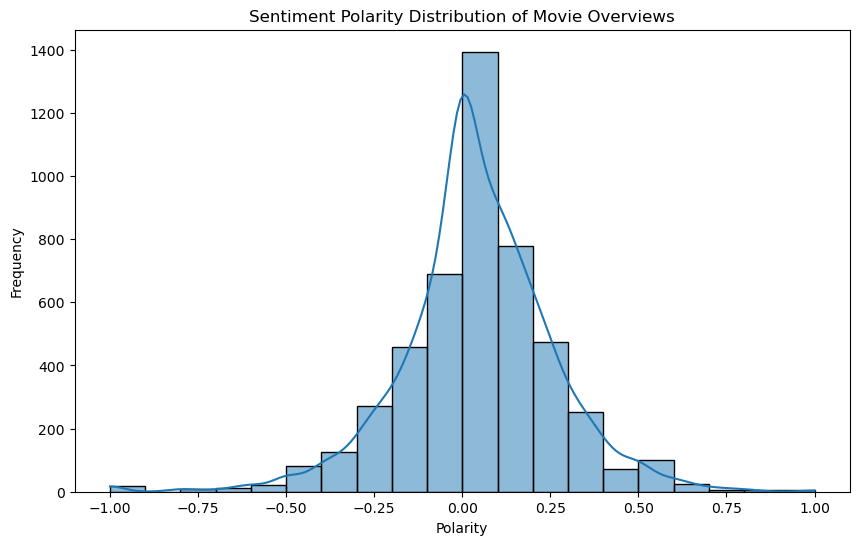

In [23]:
from textblob import TextBlob

# Perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

movies_cleaned['sentiment'] = movies_cleaned['overview'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['sentiment'], bins=20, kde=True)
plt.title("Sentiment Polarity Distribution of Movie Overviews")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Convert genres, cast, and crew into binary features
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(movies_cleaned['genres'])
cast_matrix = mlb.fit_transform(movies_cleaned['cast'])
crew_matrix = mlb.fit_transform(movies_cleaned['crew'])

# Combine all features
combined_features = hstack([tfidf_matrix, genres_matrix, cast_matrix, crew_matrix])

# Compute cosine similarity
hybrid_cosine_sim = cosine_similarity(combined_features, combined_features)

# Function for hybrid recommendations
def get_hybrid_recommendations(title, hybrid_cosine_sim=hybrid_cosine_sim):
    indices = pd.Series(movies_cleaned.index, index=movies_cleaned['title']).drop_duplicates()
    idx = indices[title]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(hybrid_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return movies_cleaned['title'].iloc[movie_indices]

# Test hybrid recommendations
print("Hybrid Recommendations for 'Avatar':")
print(get_hybrid_recommendations('Avatar'))


Hybrid Recommendations for 'Avatar':
169    Captain America: The First Avenger
59                                   2012
994                                 Gamer
47                Star Trek Into Darkness
27                             Battleship
16                           The Avengers
206                   Clash of the Titans
149                            Armageddon
209                     The Bourne Legacy
951                        Into the Storm
Name: title, dtype: object


C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\3420218457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year


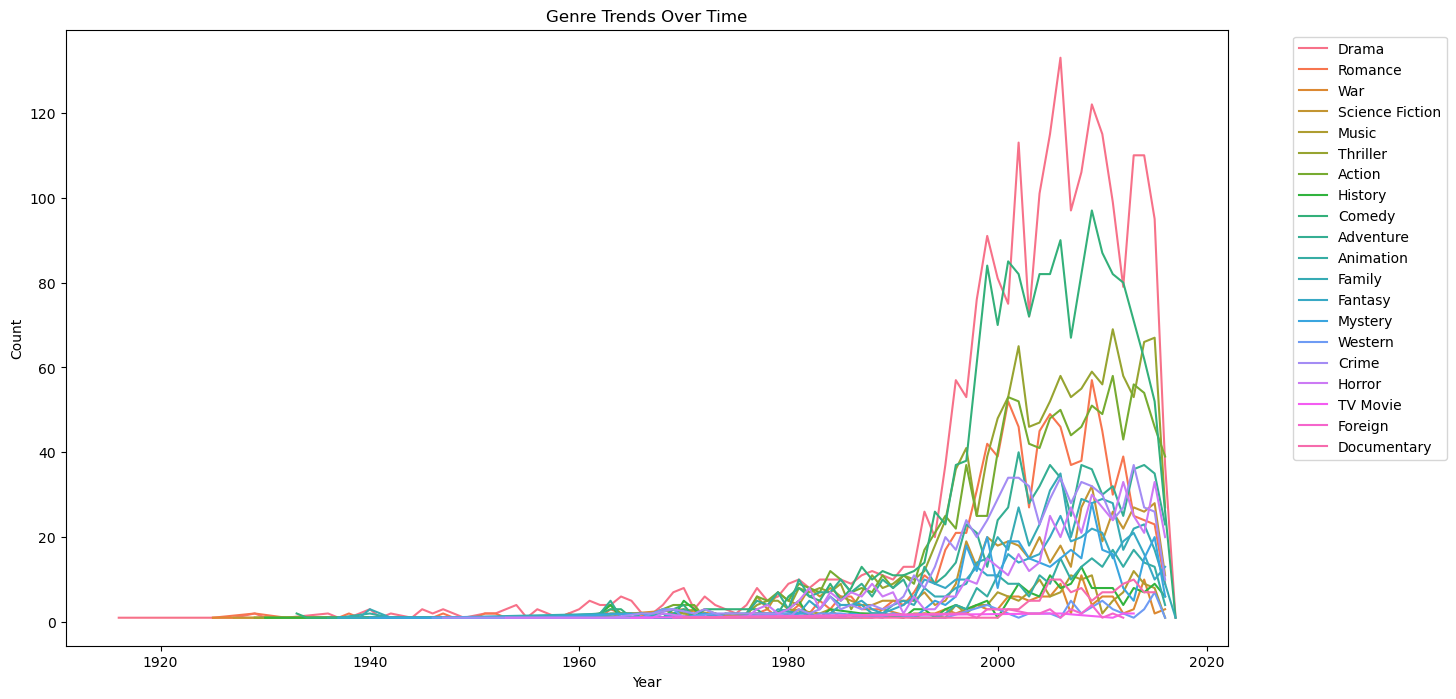

In [25]:
# Extract year from release_date
movies_cleaned['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year

# Count genres over the years
genre_trends = movies_cleaned.explode('genres').groupby(['release_year', 'genres']).size().reset_index(name='count')

# Plot genre trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='genres')
plt.title("Genre Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\mkhan\AppData\Local\Temp\ipykernel_23192\294038353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['sentiment'] = movies_cleaned['overview'].apply(lambda x: TextBlob(x).sentiment.polarity)


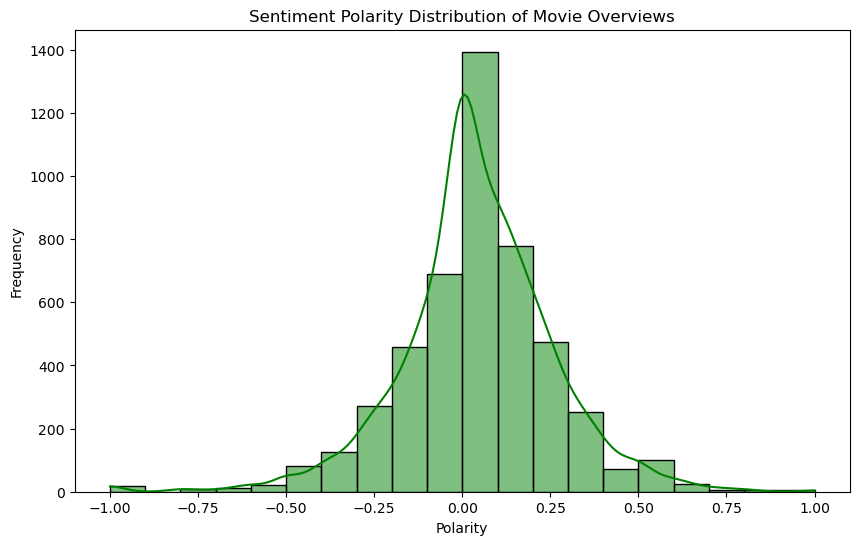

In [26]:
from textblob import TextBlob

# Sentiment analysis of overviews
movies_cleaned['sentiment'] = movies_cleaned['overview'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['sentiment'], bins=20, kde=True, color='green')
plt.title("Sentiment Polarity Distribution of Movie Overviews")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


### **Conclusion**
This project showcases the practical application of concepts learned during the semester, including NLP, machine learning, 
and data visualization. By integrating advanced techniques and real-world datasets, this **Movie Recommendation System**
not only demonstrates technical proficiency but also provides a useful tool for enhancing user experiences in the entertainment
industry.The polished deliverables and engaging demonstration make it a standout project for academic and professional purposes.